## Assignment 1 Forecasting - Ian Dias u67905892

### Question 1 and 2

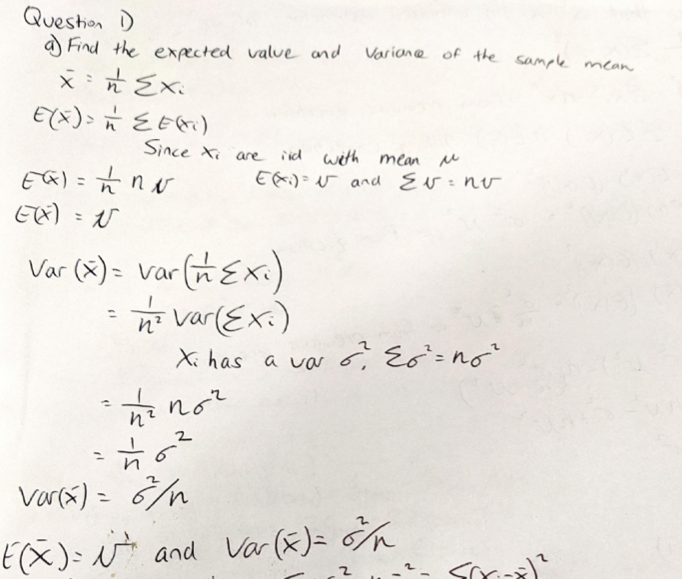

In [396]:
from IPython.display import Image
Image(filename='Question_1.png', width=700)

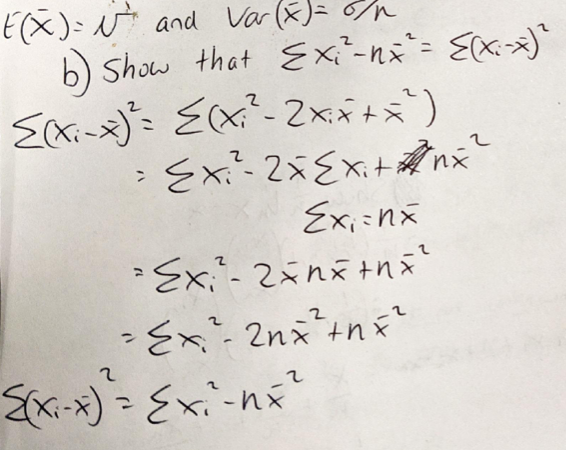

In [397]:
Image(filename='Question_1a.png', width=700)

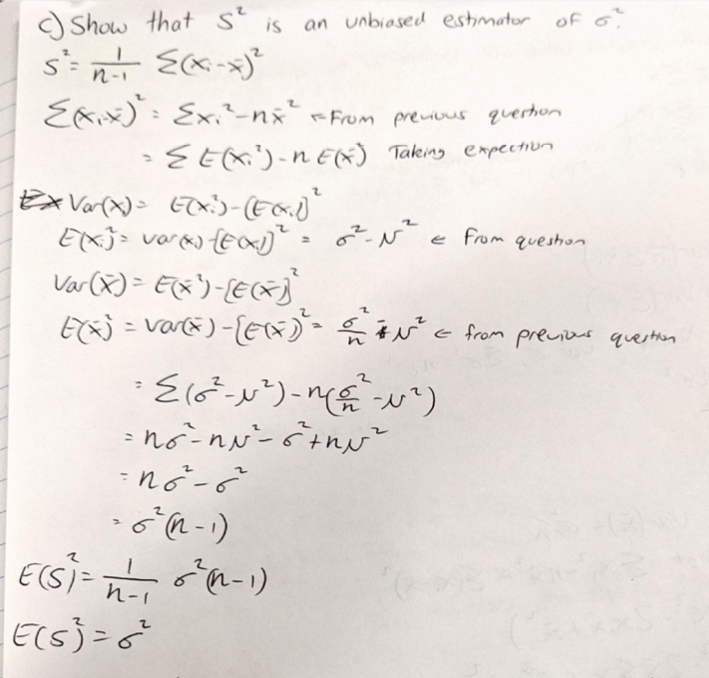

In [398]:
Image(filename='Question_1b.png', width=700)

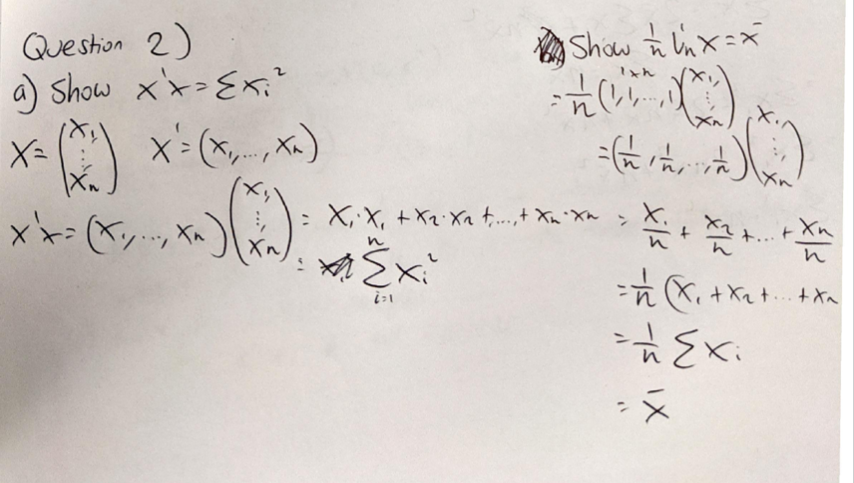

In [399]:
Image(filename='Question_2a.png', width=700)

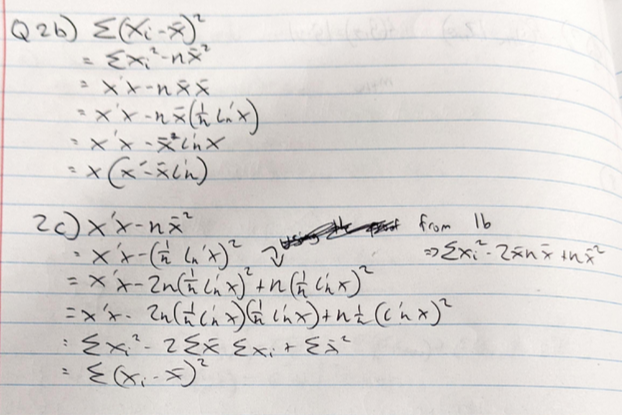

In [401]:
Image(filename='Question_2c.png', width=700)

### Question 3


In [402]:
import numpy as np
import plotly.express as px
import seaborn as sns

In [403]:
def time_series(a_0 = 100, a_1 = 1, a_2 = 0.12, b_1 = 25, b_2 = 0, omega = np.pi/8, var = 16,
               cycle=False):
    np.random.seed(42) #Doesn't change the random when initialized again
    e = np.random.normal(loc = 0, scale = np.sqrt(var), size = 200) #Generates an array of error terms with mean 0 and std(4)
    c, m, y = [], [], []
    for T in range(101):
        c.append(b_1*np.sin(omega*T) + b_2*np.cos(omega*T))
    for T in range(101):
        m.append(a_0 + a_1*T + a_2*(T**2))
    if cycle: #If cycle = True, incorporates question 3b and adds a cycle component to the function. Otherwise skips
            new_c = c[2:]
            new_m = m[2:]
            c_two = c[:2]
            c_hat = [new_c[i] * (new_m[i]/250) for i in range(len(new_c))]
            c = c_two + c_hat  
    for T in range(101):
        y.append(m[T] + c[T] + e[T])
    return y

def graph(func, title, x = 'Time', y = 'y'): #Graphs the functions
    
    return px.line(func, labels={'index':x, 'value':y}, title=title)

graph(time_series(), title='Question 3a')
#Question 3a

In [404]:
graph(time_series(cycle=True), title='Question 3b')
#Question 3b

##### Q3 c) A GDP graph has different phases associated with it. During an expansion phase, the economy faces growth where interests rates are lower and production increases. These factors compound and cause more growth until it plateaus. A series of contractions then occurs where the growth slows and GDP dips. These indiciate that GDP has a cyclical component abd as such b) would be the better model. 

In [405]:
#Question 4
def mean_revert(T = 100,mu = 20, pho = 0.7, var = 9):
    np.random.seed(42)
    e = np.random.normal(loc = 0, scale = np.sqrt(var), size = 200)
    y = [0,]; y[0] = mu
    #print("this is e {}".format(e))
    for i in range(T):
        y.append(mu + pho*(y[i] - mu) + e[i])

    #print("this is y {}".format(y))
    return y
np.random.normal()
graph(mean_revert(), title='Question 4')

#### In this process, the series always reverts back to the mean - hence the name mean reverting. This is due to pho being less than |1|, if it was higher it would not revert back onto itself and would be a non-convergent series

### Question 5

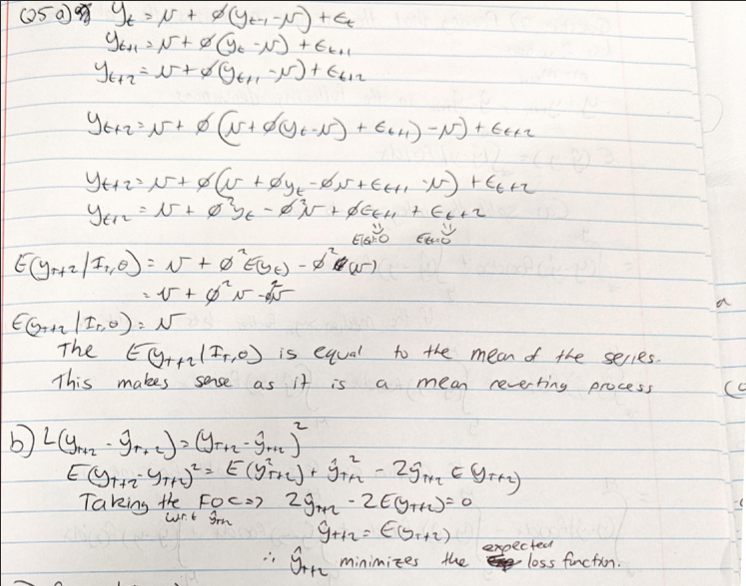

In [406]:
Image(filename='Question_5a.png', width=700)

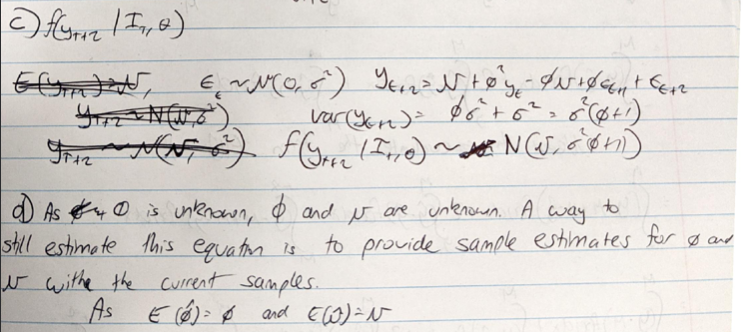

In [407]:
Image(filename='Question_5b.png', width=700)

##### Why is this mean reverting? This is due to pho being less than 1 so the series reverts back onto the series mean. 

In [408]:
#Question 6
import pandas as pd
index = ['2014 Q3', '2014 Q4','2015 Q1','2015 Q2','2015 Q3','2015 Q4','2016 Q1','2016 Q2','2016 Q3','2016 Q4',
        '2017 Q1','2017 Q2','2017 Q3','2017 Q4','2018 Q1','2018 Q2','2018 Q3','2018 Q4','2019 Q1','2019 Q2',
        '2019 Q3','2019 Q4','2020 Q1','2020 Q2']
inflation = [0.4, 0.1, -0.1, 0.4, 0.2, 0.2, 0.2, 0.2, 0.8, 0.6, 0.6, 0.0, 
             0.9, 0.6, 0.8, 0.4, 0.6, 0.7, 0.1, 0.3, 0.7, 0.6, 0.4, -2.3]
data = pd.DataFrame(data = inflation, index = index)

In [409]:
def random_walk(var = np.var(data)):
    np.random.seed(seed=None)
    predicted = []
    

In [410]:
def random_walk(var = np.var(data)):
    np.random.seed(seed=None)
    predicted = []
    for i in range(len(data[6:])):
        error = np.random.normal(scale = np.sqrt(np.var(data[:6+i])))
        predicted.append(data[0][5+i] + error)                                                                         
    return predicted

Text(0.5, 1.0, 'Question 6a Random Walk')

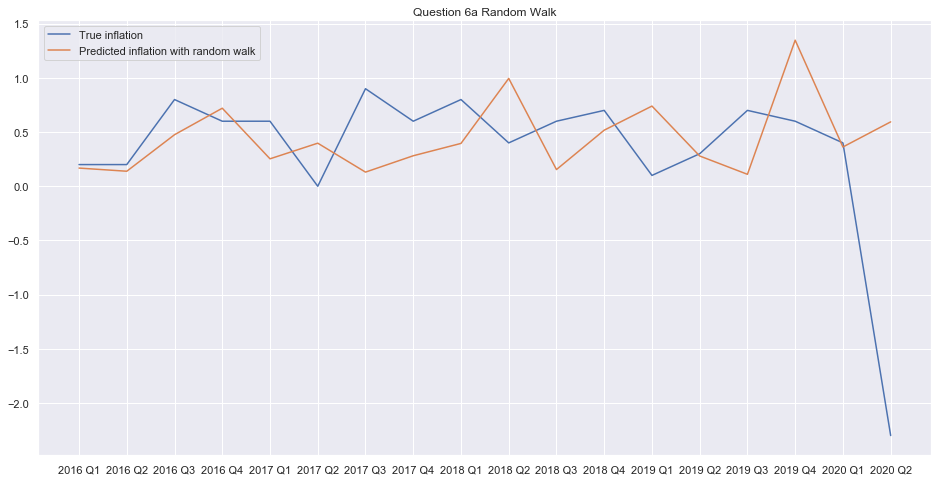

In [411]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(data[6:], label='True inflation')
plt.plot(random_walk(), label='Predicted inflation with random walk')
plt.legend()
sns.set()
plt.title("Question 6a Random Walk")

In [412]:
def historical_mean():
    """Takes the historical average and plots that as the next value"""
    #yt+1 = average at yt
    avg, count = [], []
    for i in data[0]:
        count.append(i)
        avg.append(np.array(count).mean())
    return avg[6:]
    #Makes a list of progressive averages
    

Text(0.5, 1.0, 'Question 6a Historical Mean')

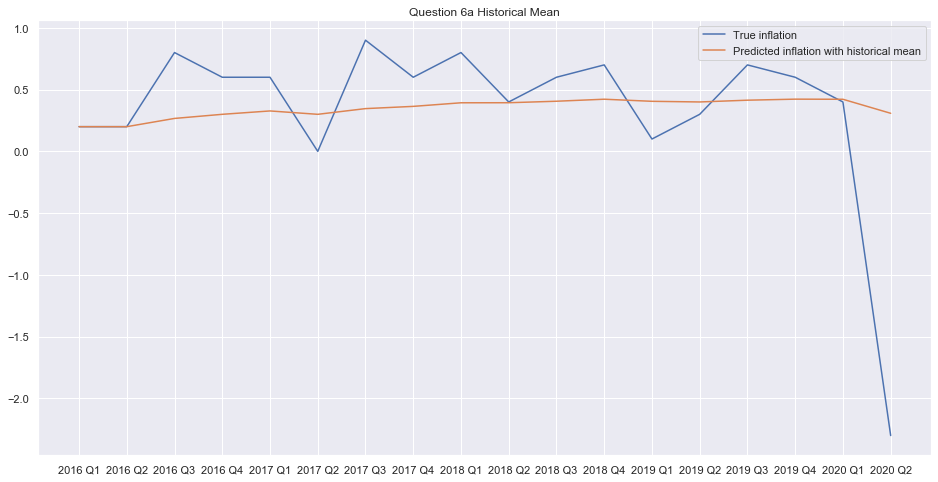

In [413]:
plt.plot(data[6:], label='True inflation')
plt.plot(historical_mean(), label='Predicted inflation with historical mean')
plt.legend()
plt.title("Question 6a Historical Mean")

#### Question 6b

In [414]:
data_error = data[6:]
def forecast_error(forecast, T, h, MAFE=False, MSFE=False):
    if MAFE:
        sum_together = np.array(data_error).T - np.array(forecast)
    elif MSFE:
        sum_together = ((np.array(data_error).T - np.array(forecast)))**2
    else:
        print("Please provide a proper error")
    sum_together = sum_together[0]
    sum_together = sum_together[:len(sum_together)-1]
    T0 = 5
    error = 1/(T-h-T0+1) * sum(sum_together)
    return error

In [415]:
mafe_rw = forecast_error(random_walk(), len(data_error), 1, MAFE=True)
msfe_rw = forecast_error(random_walk(), len(data_error), 1, MSFE=True)
print("The Random Walk process has a MAFE of {} and a MSFE of {}".format(mafe_rw, msfe_rw))
mafe_hm = forecast_error(historical_mean(), len(data_error), 1, MAFE=True)
msfe_hm = forecast_error(historical_mean(), len(data_error), 1, MSFE=True)
print("The Historical Mean process has a MAFE of {} and a MSFE of {}".format(mafe_hm, msfe_hm))

print("The Historical Mean process has a lower MAFE and a slightly lower MSFE, indictating it is the better model. ")

The Random Walk process has a MAFE of -0.01740848256007478 and a MSFE of 0.18002902257437425
The Historical Mean process has a MAFE of 0.19357060475244667 and a MSFE of 0.1075466807395484
The Historical Mean process has a lower MAFE and a slightly lower MSFE, indictating it is the better model. 


##### As the MAFE and MSFE is very variable to the error terms and the MSFE for both models are so close, an average of MAFE and MSFE is derived below.

In [416]:
avg_mafe_rw, avg_mafe_hm = [], []
avg_msfe_rw, avg_msfe_hm = [], []
for i in range(50):
    mafe_rw = forecast_error(random_walk(), len(data_error), 1, MAFE=True)
    avg_mafe_rw.append(mafe_rw)
    mafe_hm = forecast_error(historical_mean(), len(data_error), 1, MAFE=True)
    avg_mafe_hm.append(mafe_hm)
    
winner_msfe = []
for i in range(50):
    msfe_rw = forecast_error(random_walk(), len(data_error), 1, MSFE=True)
    avg_msfe_rw.append(msfe_rw)
    msfe_hm = forecast_error(historical_mean(), len(data_error), 1, MSFE=True)
    avg_msfe_hm.append(msfe_hm)

In [417]:
print("""Within 50 tests, \t  the average MAFE for a Random Walk process is: {}
                          the average MAFE for a Historical Mean process is: {}
                          the average MSFE for a Random Walk process is: {} 
                          the average MSFE for a Historical Mean process is: {}""".format(np.array(avg_mafe_rw).mean(),
                                                                                          np.array(avg_mafe_hm).mean(),
                                                                                         np.array(avg_msfe_rw).mean(), 
                                                                                                  np.array(avg_msfe_hm).mean()))

Within 50 tests, 	  the average MAFE for a Random Walk process is: 0.34708627872489034
                          the average MAFE for a Historical Mean process is: 0.19357060475244667
                          the average MSFE for a Random Walk process is: 0.27450422348566367 
                          the average MSFE for a Historical Mean process is: 0.10754668073954841


Evident from above, the Historical mean is a better model for both MAFE and MSFE accuracy models. 

##### Question 6c) A third measure used will be from the library sklearn which defines a module median_absolute_error. 
The equation defining it is the followng:
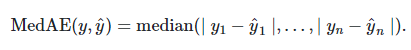

In [418]:
from sklearn.metrics import median_absolute_error as mae
mae_rw = mae(data_error, random_walk())
mae_hm = mae(data_error, historical_mean())
print("""The Median Absolute Error as defined by sklearn for this Random Walk forecast is: {} and for 
the Historical Mean forecast is {}. The Random Walk is a better forecast under this error model""".format(mae_rw, mae_hm))

The Median Absolute Error as defined by sklearn for this Random Walk forecast is: 0.3913545568352953 and for 
the Historical Mean forecast is 0.2752525252525252. The Random Walk is a better forecast under this error model


##### Question 6d)

In [419]:
px.line(data)

##### In the above graph, 2020 Q2 has a significant decline when compared to previous years with a growth of -2.3. This is due to the COVID-19 pandemic which developed in Australia at the end of the first quarter. Investments have reduced, consumption has significantly decreased as consumers want to save more. Social interaction is severely limited and businesses have been placed on lockdown. All these factors contributed to the steep decline in Q2 of 2020.

### Question 7

In [420]:
IFrame("ian-5-7.pdf", width=900, height=1900)

### Question 8a)

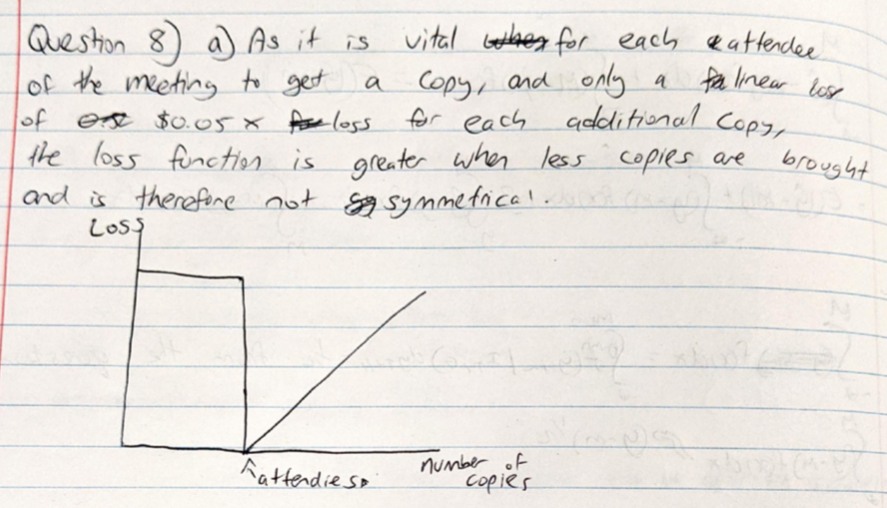

In [421]:
Image(filename='Question_8a.png', width=700)

### Question 8b)

#### As the attendees are able to share, the loss function starts off lower than the previous question. As you bring more copies the loss function reduces until you reach the number of attendees. Once the number of attendies equals the number of copies, there is a steep rise in the loss function. This indicates that the function is not symmetric. 

### Question 8c)
#### At equilibrium, the price of a good is equal to its marginal benefit, in this case the cost of the input would equal the benefit it outputs. If the quantity of the input gets over or underestimated, P > MB or P < MB and the production will be inefficient. The loss of either of these problems will be the same if the same magnitude and as such the loss function is symmetric.
